# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [2]:
import os

# Directory containing images
directory = 'data\coco'

# Get list of files in the directory
files = os.listdir(directory)

# Iterate through files and remove those with extensions other than .jpeg, .jpg, and .png
for file in files:
    if not file.lower().endswith(('.jpeg', '.jpg', '.png')):
        os.remove(os.path.join(directory, file))
        print(f"Removed: {file}")


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\zliya\AppData\Local\Temp\ipykernel_20168\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data\coco' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
import os

data_dir = 'data'  # Replace 'data' with the actual path to your data directory
image_exts = ['jpg', 'jpeg', 'png']  # Add more extensions if needed

for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try: 
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts: 
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e: 
                print('Issue with image {}'.format(image_path))
                # os.remove(image_path)
    else:
        print(f"{class_path} is not a directory")


# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 102 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

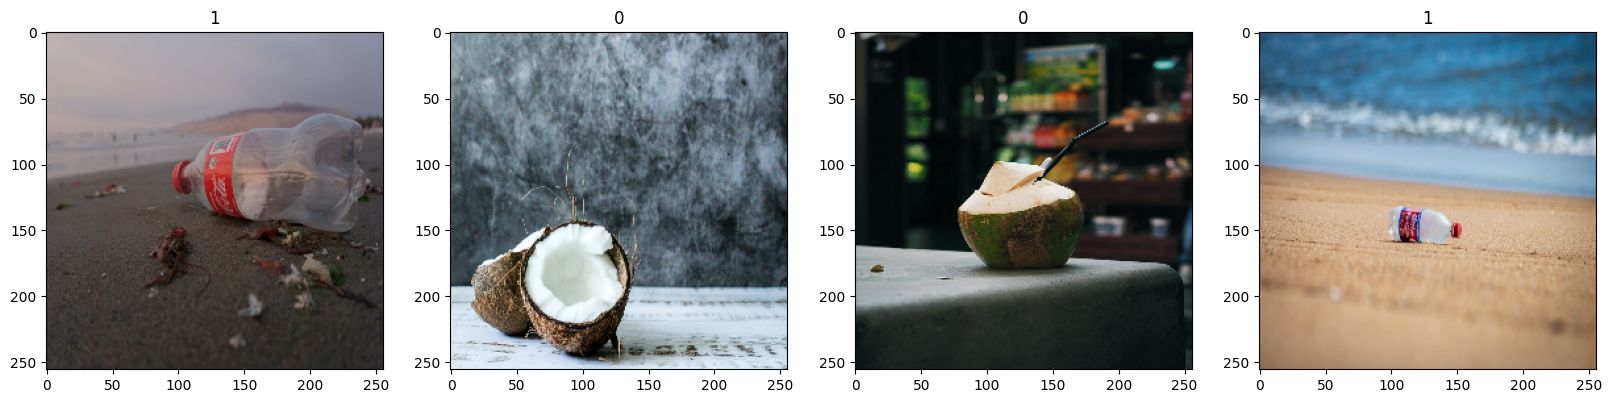

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.13836192, 0.17720996, 0.20288397],
          [0.13714312, 0.18028037, 0.2038098 ],
          [0.17966716, 0.21888284, 0.25417694],
          ...,
          [0.09207392, 0.11744157, 0.14097099],
          [0.10082948, 0.10701366, 0.1266215 ],
          [0.10695107, 0.11372549, 0.13333334]],
 
         [[0.14652267, 0.18392   , 0.21352096],
          [0.1370524 , 0.17672934, 0.2075632 ],
          [0.15673995, 0.19595565, 0.23167497],
          ...,
          [0.10356158, 0.11996783, 0.14189644],
          [0.09727245, 0.12168268, 0.13576816],
          [0.09716378, 0.12157401, 0.13565949]],
 
         [[0.14154412, 0.17683823, 0.21213235],
          [0.14748403, 0.18277815, 0.21807227],
          [0.14112286, 0.18033855, 0.21955423],
          ...,
          [0.10588235, 0.11764706, 0.13725491],
          [0.09803922, 0.12941177, 0.14117648],
          [0.10991115, 0.1412837 , 0.15304841]],
 
         ...,
 
         [[0.84313726, 0.8862745 , 0.89411765],
          [0.84850

# 5. Split Data

In [34]:
train_size = int(len(data)*.7)
val_size = 1
test_size = 1

In [43]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [37]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2/2 [==============================] - ETA: 0s - loss: 1.3883 - accuracy: 0.6719

ValueError: Expected input data to be non-empty.

# 8. Plot Performance

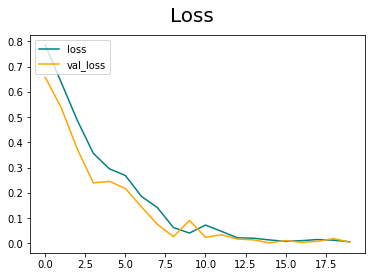

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

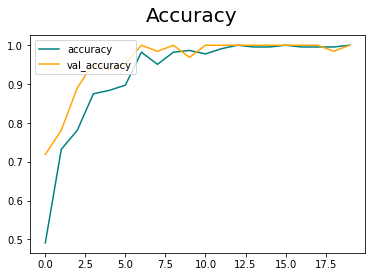

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

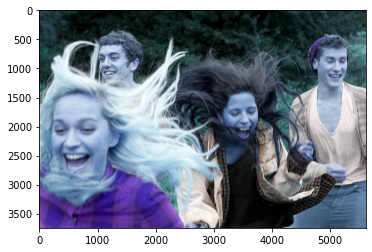

In [39]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

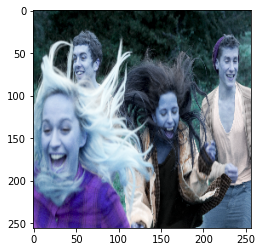

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [42]:
yhat

array([[0.01972741]], dtype=float32)

In [43]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)

# Trail

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from tqdm import tqdm

In [11]:
# Define the path to your dataset directories
train_dir = 'data'
test_dir = 'test'

# Get the list of classes (assuming each subdirectory in train_dir represents a class)
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Initialize lists to store images and labels
train_images = []
train_labels = []
test_images = []

# Loop through the training data and preprocess the images
for cls in classes:
    cls_dir = os.path.join(train_dir, cls)
    for img_name in os.listdir(cls_dir):
        img_path = os.path.join(cls_dir, img_name)
        if os.path.isfile(img_path):
            img = image.load_img(img_path, target_size=(28, 28), grayscale=True)
            img = image.img_to_array(img)
            img = img / 255.0  # Normalize pixel values
            train_images.append(img)
            train_labels.append(classes.index(cls))  # Assign label based on class index



C:\Users\zliya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [13]:
# Check the length and content of train_labels
print("Number of labels extracted:", len(train_labels))
print("Example labels:", train_labels[10:-1])  # Print the first few labels

# If the length of train_labels is zero or if it looks incorrect, investigate the label extraction process


Number of labels extracted: 102
Example labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
# Convert lists to numpy arrays
X_train = np.array(train_images)
y_train = to_categorical(train_labels)  # One-hot encode labels

In [15]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [17]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))  # Output layer with number of neurons equal to number of classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/10
3/3 [==============================] - 2s 240ms/step - loss: 0.7620 - accuracy: 0.5802 - val_loss: 0.6595 - val_accuracy: 0.6667
Epoch 2/10
3/3 [==============================] - 0s 50ms/step - loss: 0.7140 - accuracy: 0.4321 - val_loss: 0.6635 - val_accuracy: 0.6667
Epoch 3/10
3/3 [==============================] - 0s 49ms/step - loss: 0.6384 - accuracy: 0.6790 - val_loss: 0.6172 - val_accuracy: 0.6667
Epoch 4/10
3/3 [==============================] - 0s 48ms/step - loss: 0.6367 - accuracy: 0.6543 - val_loss: 0.6158 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 0s 51ms/step - loss: 0.6295 - accuracy: 0.6543 - val_loss: 0.5919 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 0s 56ms/step - loss: 0.5819 - accuracy: 0.6543 - val_loss: 0.5764 - val_accuracy: 0.6667
Epoch 7/10
3/3 [==============================] - 0s 52ms/step - loss: 0.5809 - accuracy: 0.6543 - val_loss: 0.5554 - val_accuracy: 0.6667
Epoch 8/10
3/3 [==========

In [28]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


3/3 [==============================] - 0s 87ms/step - loss: 0.0577 - accuracy: 1.0000 - val_loss: 0.5390 - val_accuracy: 0.8095
Epoch 2/10
3/3 [==============================] - 0s 50ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.6186 - val_accuracy: 0.7619
Epoch 3/10
3/3 [==============================] - 0s 52ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.5715 - val_accuracy: 0.7619
Epoch 4/10
3/3 [==============================] - 0s 50ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 0.5886 - val_accuracy: 0.7619
Epoch 5/10
3/3 [==============================] - 0s 51ms/step - loss: 0.0367 - accuracy: 0.9753 - val_loss: 0.5925 - val_accuracy: 0.7619
Epoch 6/10
3/3 [==============================] - 0s 55ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.6221 - val_accuracy: 0.8571
Epoch 7/10
3/3 [==============================] - 0s 57ms/step - loss: 0.0352 - accuracy: 0.9877 - val_loss: 0.6142 - val_accuracy: 0.7619
Epoch 8/10
3/3 [======================

In [39]:
import cv2
import numpy as np
from keras.preprocessing import image

# Load the image
img_path = 'sad/0x0.jpg'  # Replace 'path/to/your/image.jpg' with the actual path to your image
img = cv2.imread(img_path)

# Preprocess the image (resize and normalize)
img = cv2.resize(img, (28, 28))  # Assuming the input size of your model is 28x28
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
img = img.astype('float32') / 255.0  # Normalize pixel values

# Expand dimensions to match model input shape (add batch dimension)
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)  # Add channel dimension for grayscale

# Make predictions
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

# Print the predicted label
print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 36ms/step
Predicted label: 0
